<a href="https://colab.research.google.com/github/whistle-hikhi/K-Means-clustering/blob/main/k_means_clustering_sklearn_cuML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Mar 26 07:21:21 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   65C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
%load_ext cuml.accel
import sklearn

[2025-03-26 07:21:43.703] [CUML] [info] cuML: Installed accelerator for sklearn.
[2025-03-26 07:22:09.325] [CUML] [info] cuML: Installed accelerator for umap.
[2025-03-26 07:22:09.406] [CUML] [info] cuML: Installed accelerator for hdbscan.
[2025-03-26 07:22:09.406] [CUML] [info] cuML: Successfully initialized accelerator.


In [3]:
import numpy as np
import matplotlib as plt
from sklearn.cluster import KMeans

In [4]:
np.random.seed(16)
points = np.vstack([
    np.random.normal(0, 0.5, (50, 2)),
    np.random.normal(3, 0.5, (50,2)),
    np.random.normal(-2, 0.5, (50, 2))
])

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [6]:
%%time
kmeans.fit(points)

CPU times: user 287 ms, sys: 86.7 ms, total: 373 ms
Wall time: 683 ms


KMeans(n_clusters=3, random_state=42)

In [7]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

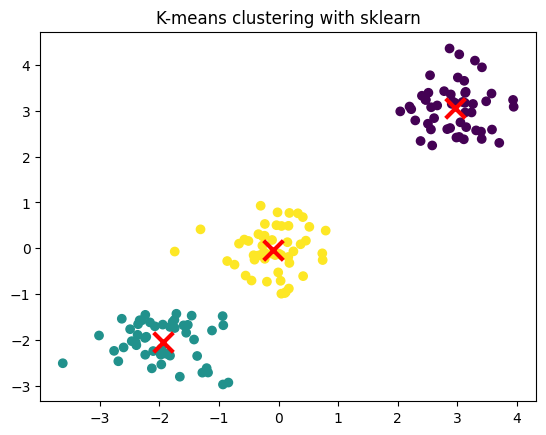

Cluster Centers:
[[ 2.95227356  3.07003103]
 [-1.93946643 -2.03888208]
 [-0.10067386 -0.03674646]]


In [11]:
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='x', s=200, linewidths=3)
plt.title("K-means clustering with sklearn")
plt.show()

print("Cluster Centers:")
print(centroids)